In [242]:
import numpy as np
import matplotlib.pyplot as plt

In [243]:
def rotate(arr, angle, deg=False):
    if deg:
        angle = angle/180*np.pi
    return np.around(arr * np.exp(angle*1j),6)

In [244]:
def translate(arr, direction):
    return arr + direction

In [245]:
def scale(arr, mag, origin = 0+0*1j):
    return (arr - origin) * mag + origin

In [246]:
def getReq(aspectRatio=1, origin=0+0*1j, xLen = None):                      #aspectRatio = Y/X
    if xLen == None:
        xLen = np.random.randn()+1
    return np.array([
        [origin + xLen*aspectRatio*1j/2 - xLen/2, origin + xLen*aspectRatio*1j/2 + xLen/2],
        [origin - xLen*aspectRatio*1j/2 - xLen/2, origin - xLen*aspectRatio*1j/2 + xLen/2]
    ])

In [257]:
def plot(arr):
    xCorr = arr.real
    yCorr = arr.imag

    plt.axhline(0, color='#86bfd1',)
    plt.axvline(0, color='#86bfd1')
    plt.grid()
    plt.xlim(xCorr.min()-1,xCorr.max()+1)
    plt.ylim(yCorr.min()-1,yCorr.max()+1)
    plt.axis('equal')
#     plt.tight_layout()
#     n = 1
#     for i, j in zip(xCorr.reshape(-1), yCorr.reshape(-1)):
#         plt.text(i, j, f"P{n}({i:0.3f},{j:0.3f})")
#         n+=1
    return plt.scatter(xCorr,yCorr)

In [254]:
def randomAspectRatio():
    return np.random.rand()**np.random.choice([1,-1])

def randomTheta():
    return np.random.rand()*2*np.pi

def randomTranslation():
    return (np.random.rand()-0.5)*8 + (np.random.rand()-0.5)*8j


In [250]:
def getEigenVec(arr, kth = 0, allVec = False):
    if allVec:
        return np.linalg.eig(arr)[1]
    eigval, eigvec = np.linalg.eig(arr)
    return eigvec[np.argpartition(eigval, -kth)[-kth:]].min()

In [283]:
def originate(v):
    return v - v.mean()

def unit(v):
    return v/np.abs(v)

def theta_opt(r, r0):
    return np.angle(r0.conj()@r)

def alignment(r0,r):
#     assert x.shape == y.shape
#     assert x0.shape == y0.shape
    
#     (x0,y0,x,y) = (x0.copy(),y0.copy(),x.copy(),y.copy())
    
#     x0 -= x0.mean()
#     y0 -= y0.mean
    
    r0, r = r0.copy(), r.copy()
    
    
    r0 = originate(r0)
    r0 = unit(r0)
    
    r = np.apply_along_axis(lambda x : rotate(unit(originate(x)),theta_opt(x,r0)), 1, r)
    
    return r

array([[[ 1.69460747-3.77863519j,  1.31585747-3.18937219j],
        [ 1.96351947-3.60579219j,  1.58476947-3.01652919j]],

       [[-1.48533951-0.72905557j, -2.74615051-1.45063557j],
        [-4.02309051+3.70513043j, -5.28390151+2.98355043j]],

       [[-1.21310135-3.5560769j , -0.08648435-2.3599699j ],
        [-0.49910035-4.2285959j ,  0.62751665-3.0324889j ]],

       [[-4.79333014+2.55885875j, -3.50555814+3.68975975j],
        [-4.12219014+1.79462375j, -2.83441814+2.92552475j]],

       [[ 3.13565572+2.05839876j,  2.81430472+2.25207476j],
        [ 3.20485872+2.17322276j,  2.88350772+2.36689876j]],

       [[ 3.35800788-0.13038085j,  1.75897788+1.48557715j],
        [ 4.24757388+0.74986715j,  2.64854388+2.36582515j]],

       [[ 0.96919915-1.11604038j,  0.71193615-0.36259438j],
        [ 1.44483215-0.95363638j,  1.18756915-0.20019038j]],

       [[ 2.9037983 -4.82454482j,  1.2600103 -3.63004282j],
        [ 3.5557163 -3.92742082j,  1.9119283 -2.73291882j]],

       [[-0.73854027+2.7

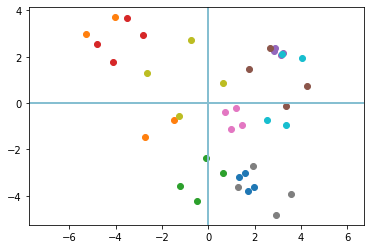

In [291]:
def plotN(arr):
    for i in arr: plot(i)

def getNRec(n=10):
    arr = np.array([
        translate(
            rotate(
                getReq(
                    aspectRatio = randomAspectRatio()
                ),
                angle = randomTheta()
            ),
            direction = randomTranslation()
        ) for _ in range(n)])
    
    plotN(arr)
        
    return arr

rec10 = getNRec()
rec10

In [287]:
modal_corr = getReq()
modal_corr

array([[-0.07810379+0.07810379j,  0.07810379+0.07810379j],
       [-0.07810379-0.07810379j,  0.07810379-0.07810379j]])

In [293]:
newArr = alignment(modal_corr, rec10)
newArr

array([[[ 0.517622+0.85561j ,  0.53866 +0.842523j],
        [ 0.510218+0.860045j,  0.528088+0.84919j ]],

       [[ 0.888946+0.458012j,  0.82519 +0.564855j],
        [ 0.653524-0.756906j,  0.94687 -0.321617j]],

       [[ 0.620447-0.784249j,  0.876771-0.480909j],
        [ 0.51563 -0.856811j,  0.713007-0.701156j]],

       [[-0.985884-0.167433j, -0.98066 +0.19572j ],
        [-0.936907-0.349577j, -0.999714-0.023903j]],

       [[-0.99807 -0.062104j, -0.98784 -0.155472j],
        [-0.99954 -0.030315j, -0.9926  -0.121432j]],

       [[-0.841936+0.539578j, -0.990148-0.140022j],
        [-0.680406+0.732835j, -0.961034+0.276429j]],

       [[ 0.283083+0.959095j, -0.275305+0.961357j],
        [ 0.435222+0.900323j,  0.13707 +0.990561j]],

       [[ 0.026651+0.999645j,  0.246774+0.969073j],
        [-0.03544 +0.999372j,  0.102595+0.994723j]],

       [[ 0.178545+0.983932j, -0.470176-0.882573j],
        [ 0.250792+0.968041j,  0.183312+0.983055j]],

       [[ 0.990315-0.138835j,  0.981822-0.1898

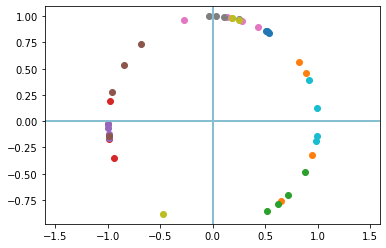

In [294]:
plotN(newArr)